# 04 Clipping Vector and Raster Data

Loaded datasets may be cropped or clipped if the spatial extent of data is far beyond what is needed for the tasks at hand. The clipping can be done by either providing a rectengular extent or by providing a polygon. The clipping can be applied to Point, MultiPoint, LineString, MultiLineString, Polygon and MultiPolygon data. 

The vector data is loaded with GeoPandas and the raster data is loaded with rasterio and then clipped with the built-in GemGIS functions. 

## Set File Paths

If you downloaded the latest `GemGIS` from the Github repository, append the path so that the package can be imported successfully. In addition, the file path to the files within the `gemgis_data` folder is set. You can download the data [here](https://github.com/cgre-aachen/gemgis_data/archive/master.zip) if you have not done so.

In [1]:
import sys
sys.path.append('../../../../gemgis')
file_path ='../../../../gemgis_data/data/04_clipping_data/'

## Clipping Vector Data by extent

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import gemgis as gg

gdf = gpd.read_file(file_path + 'randompoints.shp')

gdf.head()

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


,id,geometry
0,None,POINT (281.526 902.087)
1,None,POINT (925.867 618.577)
2,None,POINT (718.131 342.799)
3,None,POINT (331.011 255.684)
4,None,POINT (300.083 600.535)


### Plotting the Data

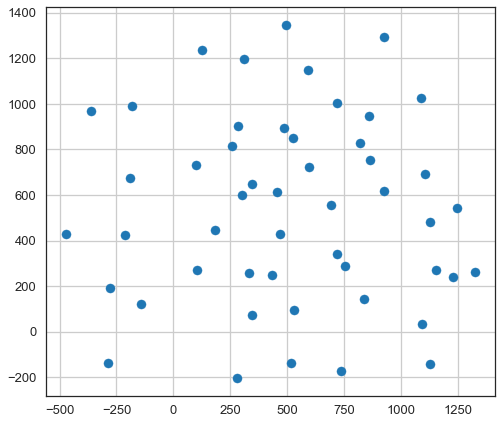

In [3]:
gdf.plot(aspect='equal')
plt.grid()

### Setting the extent to which the data will be clipped

In [4]:
bbox = [0,972, 0, 1069]

### Clipping the data

The data is clipped with the built-in function ``clip_by_bbox()``.

In [5]:
gdf_clipped = gg.vector.clip_by_bbox(gdf=gdf, 
                                     bbox=bbox)

gdf_clipped.head()

,geometry,X,Y
0,POINT (281.526 902.087),281.53,902.09
1,POINT (925.867 618.577),925.87,618.58
2,POINT (718.131 342.799),718.13,342.80
3,POINT (331.011 255.684),331.01,255.68
4,POINT (300.083 600.535),300.08,600.54


### Checking the number of data points

When printing the lengths of the GeoDataFrames, it can that the number of points was reduced to half. 

In [6]:
print(len(gdf))
print(len(gdf_clipped))

50
25


### Plotting the data

By plotting the data, it can be seen that the number of points have been reduced. 

(-250.0, 1400.0)

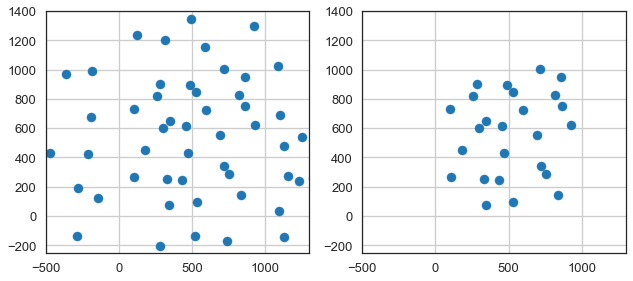

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2)

gdf.plot(ax=ax1, aspect='equal')
ax1.grid()
ax1.set_xlim(-500, 1300)
ax1.set_ylim(-250, 1400)


gdf_clipped.plot(ax=ax2, aspect='equal')
ax2.grid()
ax2.set_xlim(-500, 1300)
ax2.set_ylim(-250, 1400)

### Additional Arguments

Additional arguments can be passed to the function to reset the index and to drop columns. These arguments are true by default. 

In [8]:
gdf_clipped = gg.vector.clip_by_bbox(gdf=gdf, 
                                     bbox=bbox,
                                     reset_index=True,
                                     drop_index=True,
                                     drop_id=True, 
                                     drop_points=True, 
                                     drop_level0=True,
                                     drop_level1=True)

gdf_clipped.head()

,geometry,X,Y
0,POINT (281.526 902.087),281.53,902.09
1,POINT (925.867 618.577),925.87,618.58
2,POINT (718.131 342.799),718.13,342.80
3,POINT (331.011 255.684),331.01,255.68
4,POINT (300.083 600.535),300.08,600.54


## Clipping Vector Data by a polygon

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import gemgis as gg

gdf = gpd.read_file(file_path + 'randompoints.shp')

gdf.head()

,id,geometry
0,None,POINT (281.526 902.087)
1,None,POINT (925.867 618.577)
2,None,POINT (718.131 342.799)
3,None,POINT (331.011 255.684)
4,None,POINT (300.083 600.535)


### Plotting the Data

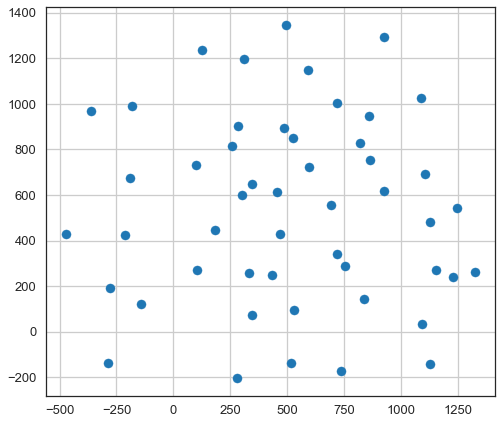

In [10]:
gdf.plot(aspect='equal')
plt.grid()

### Setting the polygon to which the data will be clipped

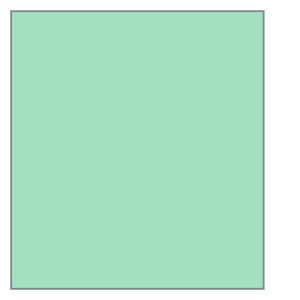

In [11]:
from shapely.geometry import Polygon

polygon = Polygon([(0,0),(972, 0), (972,1069), (0, 1069)])

polygon

### Clipping the data

The data is clipped with the built-in function ``clip_by_polygon()``.

In [12]:
gdf_clipped = gg.vector.clip_by_polygon(gdf=gdf, 
                                        polygon=polygon)

gdf_clipped.head()

,geometry
0,POINT (281.526 902.087)
1,POINT (925.867 618.577)
2,POINT (718.131 342.799)
3,POINT (331.011 255.684)
4,POINT (300.083 600.535)


### Checking the number of data points

When printing the lengths of the GeoDataFrames, it can that the number of points was reduced to half. 

In [13]:
print(len(gdf))
print(len(gdf_clipped))

50
25


### Plotting the data

By plotting the data, it can be seen that the number of points have been reduced. 

(-250.0, 1400.0)

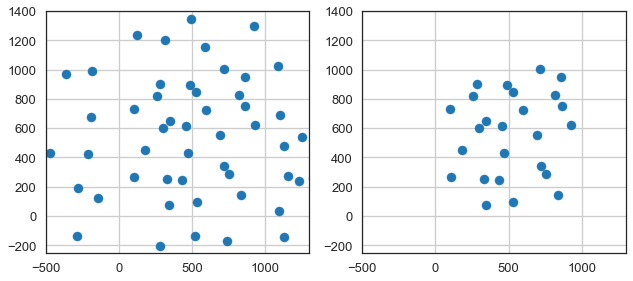

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2)

gdf.plot(ax=ax1, aspect='equal')
ax1.grid()
ax1.set_xlim(-500, 1300)
ax1.set_ylim(-250, 1400)


gdf_clipped.plot(ax=ax2, aspect='equal')
ax2.grid()
ax2.set_xlim(-500, 1300)
ax2.set_ylim(-250, 1400)

### Additional Arguments

Additional arguments can be passed to the function to reset the index and to drop columns. These arguments are true by default. 

In [15]:
gdf_clipped = gg.vector.clip_by_polygon(gdf=gdf, 
                                        polygon=polygon,
                                        reset_index=True,
                                        drop_index=True,
                                        drop_id=True, 
                                        drop_points=True, 
                                        drop_level0=True,
                                        drop_level1=True)

gdf_clipped.head()

,geometry
0,POINT (281.526 902.087)
1,POINT (925.867 618.577)
2,POINT (718.131 342.799)
3,POINT (331.011 255.684)
4,POINT (300.083 600.535)


## Clipping Raster Data by extent

In [16]:
import rasterio
import gemgis as gg

raster = rasterio.open(file_path + 'raster.tif')

### Plotting the input raster

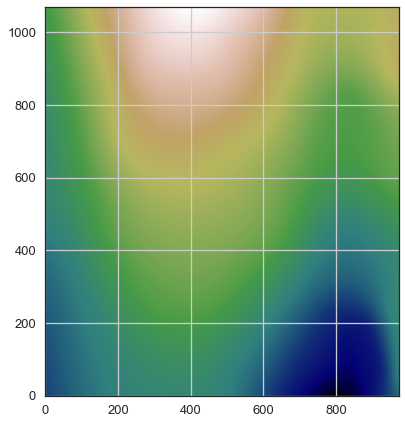

In [17]:
plt.imshow(raster.read(1), cmap='gist_earth', extent= [0,972,0,1069])
plt.grid()

### Setting the extent to which the data will be clipped

In [18]:
bbox = [250,750,250,750]

### Clipping the raster 

The data is clipped with the built-in function ``clip_by_bbox()``.

In [19]:
raster_clipped = gg.raster.clip_by_bbox(raster=raster, 
                                        bbox=bbox)

### Plotting the result

(0.0, 1069.0)

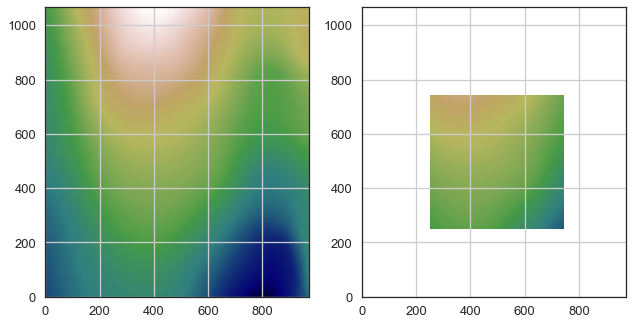

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.imshow(raster.read(1), cmap='gist_earth', extent= [0,972,0,1069], vmin=250, vmax=750)
ax1.grid()
ax1.set_xlim(0,972)
ax1.set_ylim(0,1069)


ax2.imshow(raster_clipped, cmap='gist_earth', extent= [250,750,250,750], vmin=250, vmax=750)
ax2.grid()
ax2.set_xlim(0, 972)
ax2.set_ylim(0, 1069)

### Additional Arguments

Additional arguments can be passed to directly save the clipped raster to disc. 

In [21]:
raster_clipped = gg.raster.clip_by_bbox(raster=raster, 
                                        bbox=bbox,
                                        raster_extent=None,
                                        save_clipped_raster=False,
                                        path='raster_clipped.tif')

## Clipping Raster Data by polygon

In [22]:
import rasterio
import gemgis as gg

raster = rasterio.open(file_path + 'raster.tif')

### Plotting the input raster

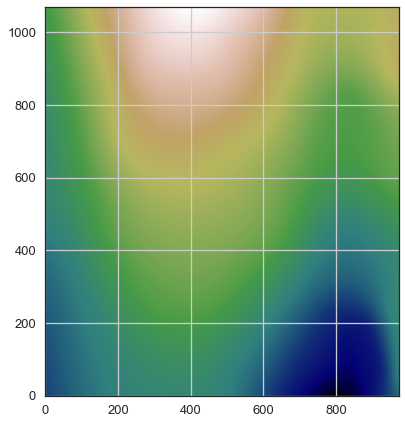

In [23]:
plt.imshow(raster.read(1), cmap='gist_earth', extent= [0,972,0,1069])
plt.grid()

### Setting the extent to which the data will be clipped

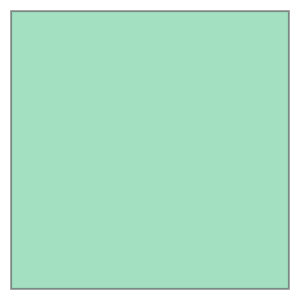

In [24]:
from shapely.geometry import Polygon

polygon = Polygon([(250,250),(750,250), (750,750), (250, 750)])

polygon

### Clipping the raster 

The data is clipped with the built-in function ``clip_by_bbox()``.

In [25]:
raster_clipped = gg.raster.clip_by_polygon(raster=raster, 
                                           polygon=polygon)

### Plotting the result

(0.0, 1069.0)

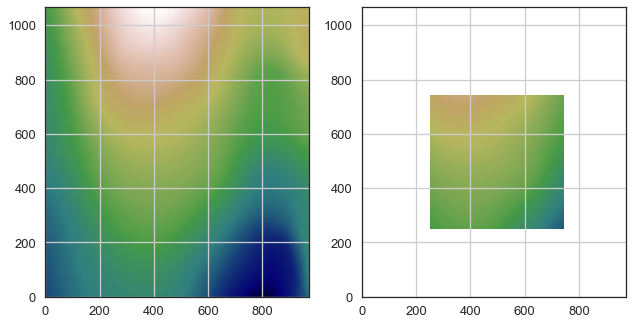

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.imshow(raster.read(1), cmap='gist_earth', extent= [0,972,0,1069], vmin=250, vmax=750)
ax1.grid()
ax1.set_xlim(0,972)
ax1.set_ylim(0,1069)


ax2.imshow(raster_clipped, cmap='gist_earth', extent= [250,750,250,750], vmin=250, vmax=750)
ax2.grid()
ax2.set_xlim(0, 972)
ax2.set_ylim(0, 1069)

### Additional Arguments

Additional arguments can be passed to directly save the clipped raster to disc. 

In [27]:
raster_clipped = gg.raster.clip_by_polygon(raster=raster, 
                                           polygon=polygon,
                                           raster_extent=None,
                                           save_clipped_raster=False,
                                           path='raster_clipped.tif')